In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
#数据是否需要标准化
scale = False
# 数据标准化：
# 会使原模型图改变，但是能够提高梯度下降法的精确性

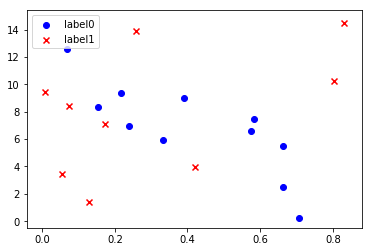

In [18]:
#载入数据
data = np.genfromtxt("LR_testset.csv",delimiter=',')
x_data = data[:20,:-1]
y_data = data[:20,-1]

#画出分类模型的散点图
def plot():
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    #切分不同类型的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    
    #画图
    scatter0 = plt.scatter(x0,y0,c='b',marker='o')
    scatter1 = plt.scatter(x1,y1,c='r',marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()
    

In [19]:
#数据处理,添加偏置项
x_data = data[:20,:-1]
y_data = data[:20,-1,np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
#给样本添加偏置项
X_data = np.concatenate((np.ones((20,1)),x_data),axis=1)
print(X_data.shape)

(20, 2)
(20, 1)
(20, 3)


In [20]:
#sigmoid函数
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

#代价函数
def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * ws)))
    return np.sum(left + right) / -(len(xMat))

#梯度下降法
def gradAscent(xArr,yArr):
    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    #计算数据行列数
    #行代表数据个数
    #列代表权值个数
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs + 1):
        #xMat和weights矩阵相乘
        h = sigmoid(xMat * ws)
        ws_grad = xMat.T * (h - yMat)/m
        ws = ws - lr * ws_grad
        
        if i % 50 ==0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [21]:
#训练模型，得到权值和cost值得变化
ws , costList = gradAscent(X_data,y_data)
print(ws)

[[ 1.        ]
 [-0.26505287]
 [ 0.43149425]]


In [22]:
if scale ==False:
    #画图决策边界
    plot()
    x_test = [[0],[1]]
    #求y_test：
#     令w0 + x1*w1 + x2*w2 = 0
#     x1与x2的关系即为所求图像直线
    y_test = (-ws[0] - x_test * ws[1]) / ws[2]
    plt.plot(x_test,y_test,'k')
    plt.show()

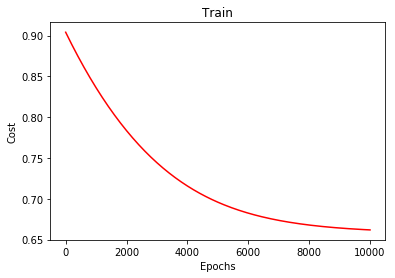

In [23]:
#画图 loss 值的变化
x = np.linspace(0,10000,201)
plt.plot(x,costList,c = 'r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [24]:
#预测
def predict(x_data,ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x>=0.5 else 0 for x in sigmoid(xMat*ws)]
precisions = predict(X_data,ws)

print(classification_report(y_data,precisions))

             precision    recall  f1-score   support

        0.0       0.60      0.55      0.57        11
        1.0       0.50      0.56      0.53         9

avg / total       0.55      0.55      0.55        20

